In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**IMPORTING DATASET**

In [58]:
df=pd.read_csv("/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")


**DATA PREPROCESSING**

In [59]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [60]:
df.shape


(299, 13)

In [61]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [62]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


**DATA CLEANING**

In [63]:
df[['age','anaemia','diabetes','high_blood_pressure','platelets','sex','DEATH_EVENT']].dropna()

,age,anaemia,diabetes,high_blood_pressure,platelets,sex,DEATH_EVENT
0,75.0,0,0,1,265000.00,1,1
1,55.0,0,0,0,263358.03,1,1
2,65.0,0,0,0,162000.00,1,1
3,50.0,1,0,0,210000.00,1,1
4,65.0,1,1,0,327000.00,0,1
...,...,...,...,...,...,...,...
294,62.0,0,1,1,155000.00,1,0
295,55.0,0,0,0,270000.00,0,0
296,45.0,0,1,0,742000.00,0,0
297,45.0,0,0,0,140000.00,1,0


**DATA VISUALISATION**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


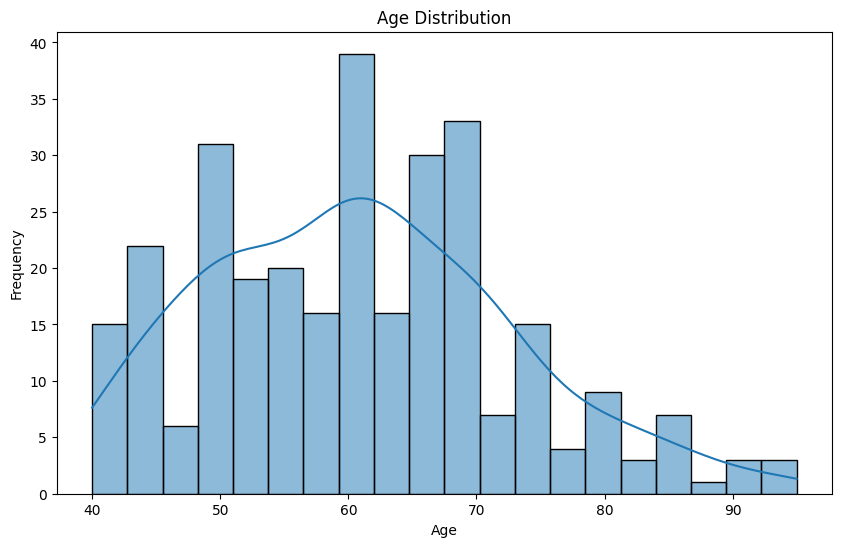

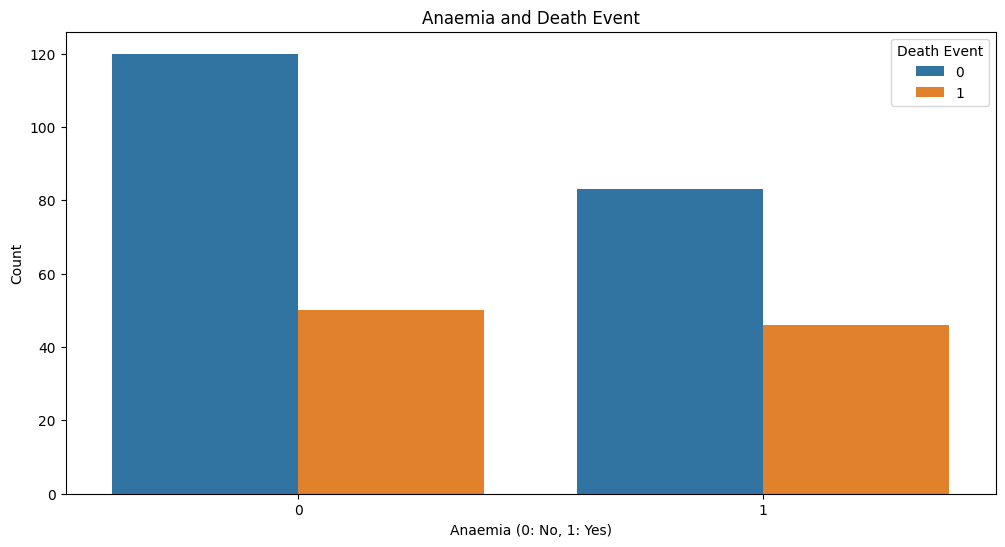

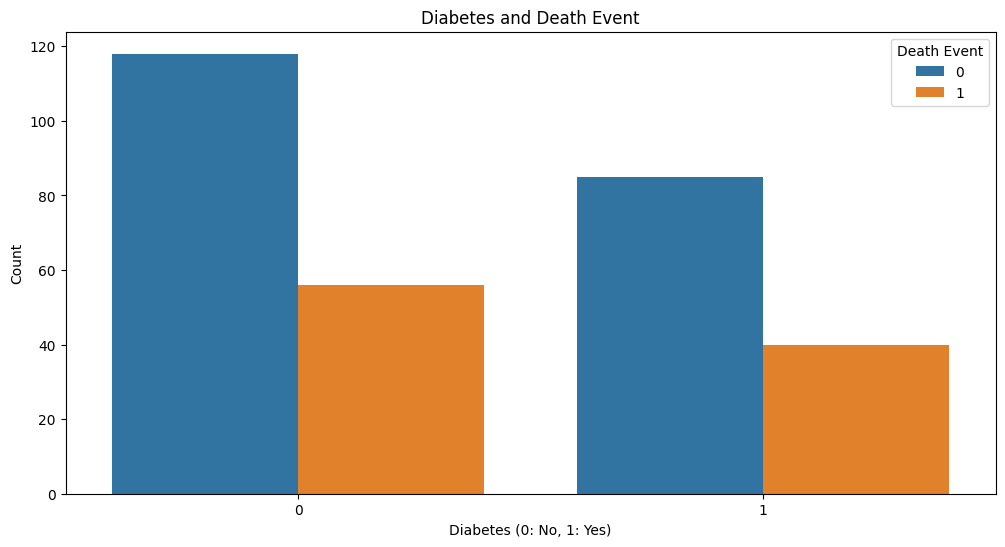

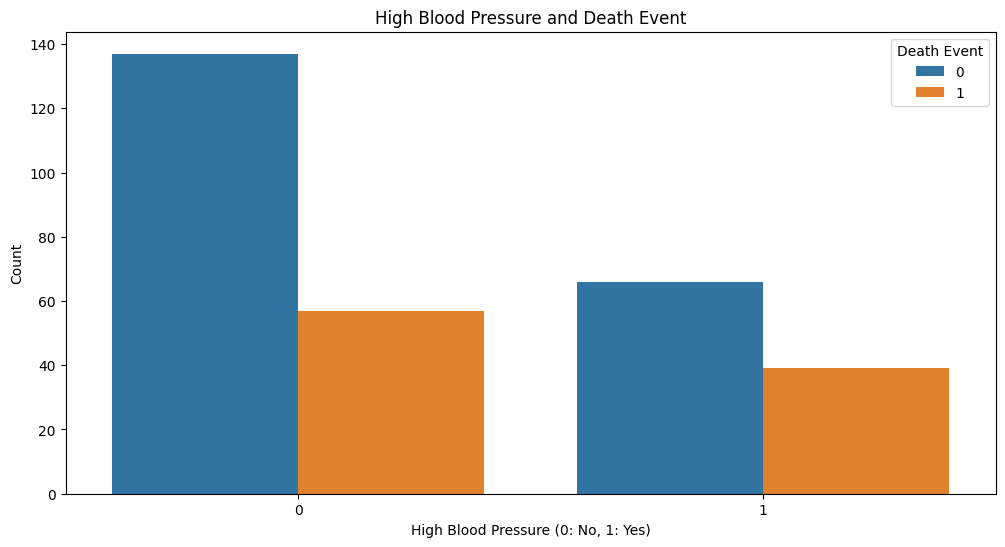

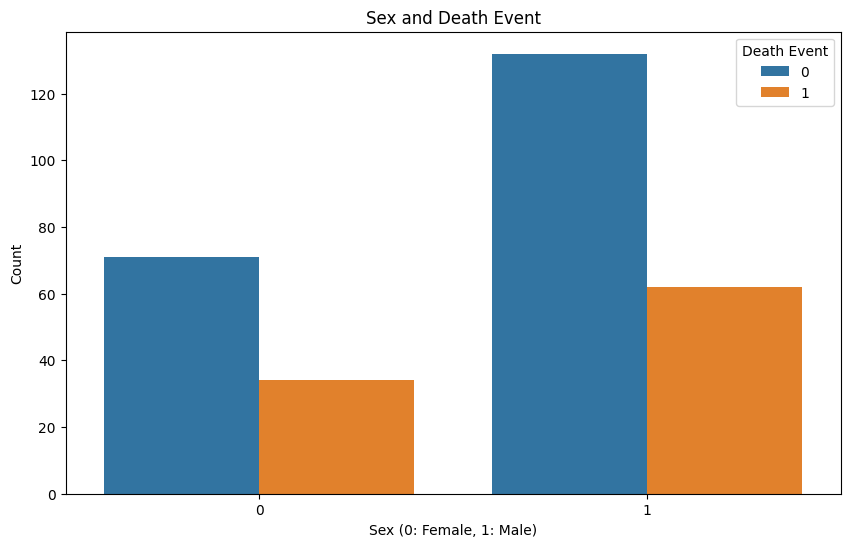

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='anaemia', hue='DEATH_EVENT')
plt.title('Anaemia and Death Event')
plt.xlabel('Anaemia (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Death Event', loc='upper right')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='diabetes', hue='DEATH_EVENT')
plt.title('Diabetes and Death Event')
plt.xlabel('Diabetes (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Death Event', loc='upper right')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='high_blood_pressure', hue='DEATH_EVENT')
plt.title('High Blood Pressure and Death Event')
plt.xlabel('High Blood Pressure (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Death Event', loc='upper right')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sex', hue='DEATH_EVENT')
plt.title('Sex and Death Event')
plt.xlabel('Sex (0: Female, 1: Male)')
plt.ylabel('Count')
plt.legend(title='Death Event', loc='upper right')
plt.show()


**BUILDING MODEL**

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df[['age', 'anaemia', 'diabetes', 'high_blood_pressure', 'platelets', 'sex']]
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.6
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.89      0.72        35
           1       0.56      0.20      0.29        25

    accuracy                           0.60        60
   macro avg       0.58      0.54      0.51        60
weighted avg       0.59      0.60      0.54        60

Confusion Matrix:
[[31  4]
 [20  5]]
